In [1]:
from sympy import *
init_printing()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib

In [2]:
t,c,n = symbols("t c n")
lam = symbols("λ")

In [3]:
def f(n,t):
    return exp(-t/lam/lam)*lam**n+c*exp(-lam*lam*t)*lam**(-n)
def a(n,t):
    return f(n+2,t)/f(n,t)
def u(n,t):
    return a(n,t)/a(n-1,t)

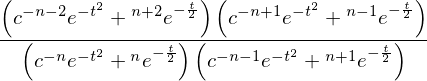

In [4]:
u(n,t)

In [5]:
simplify(diff(u(n,t),t)-u(n,t)*(u(n+1,t)-u(n-1,t)))

超離散系への移行の確認を確認する

In [47]:
A=1
P=2
R=max(0,-1-P)-max(0,-1+P)
e=0.001
p=exp(P/e)
d=exp(-1/e)
a=exp(A/e)
q=(1+d+d/p)/(1+d+d*p)

def t(n,time):
    return max(0,A+n*P+time*R)

def u(n,time):
    return t(n-1,time)+t(n+2,time+1)-t(n,time)-t(n+1,time+1)

def tau(n,time,e):
    p=exp(P/e)
    d=exp(-1/e)
    a=exp(A/e)
    q=(1+d+d/p)/(1+d+d*p)
    return 1+a*p**n*q**time

def v(n,time,e):
    return tau(n-1,time,e)*tau(n+2,time+1,e)/tau(n,time,e)/tau(n+1,time+1,e)

In [19]:
num = np.arange(-5,5,0.1)
time = np.arange(-5,5,0.1)
#t_plus = np.arange(0,5,0.1)
#t_minus = np.arange(-5,0,0.1)

N,T = np.meshgrid(num,time)
#N_plus,T_plus=np.meshgrid(n,t_plus)
#N_minus,T_minus=np.meshgrid(n,t_minus)

"""
Z = N.copy()
for j,n in enumerate(num):
    for i,ti in enumerate(time):
        Z[i][j]=u(n,ti)
"""

#Z1 = e*np.log(u_plus(N_plus,T_plus).astype(float))
#Z2 = e*np.log(u_minus(N_minus,T_minus).astype(float))

W_3 = e*np.log(v(N,T).astype(float))

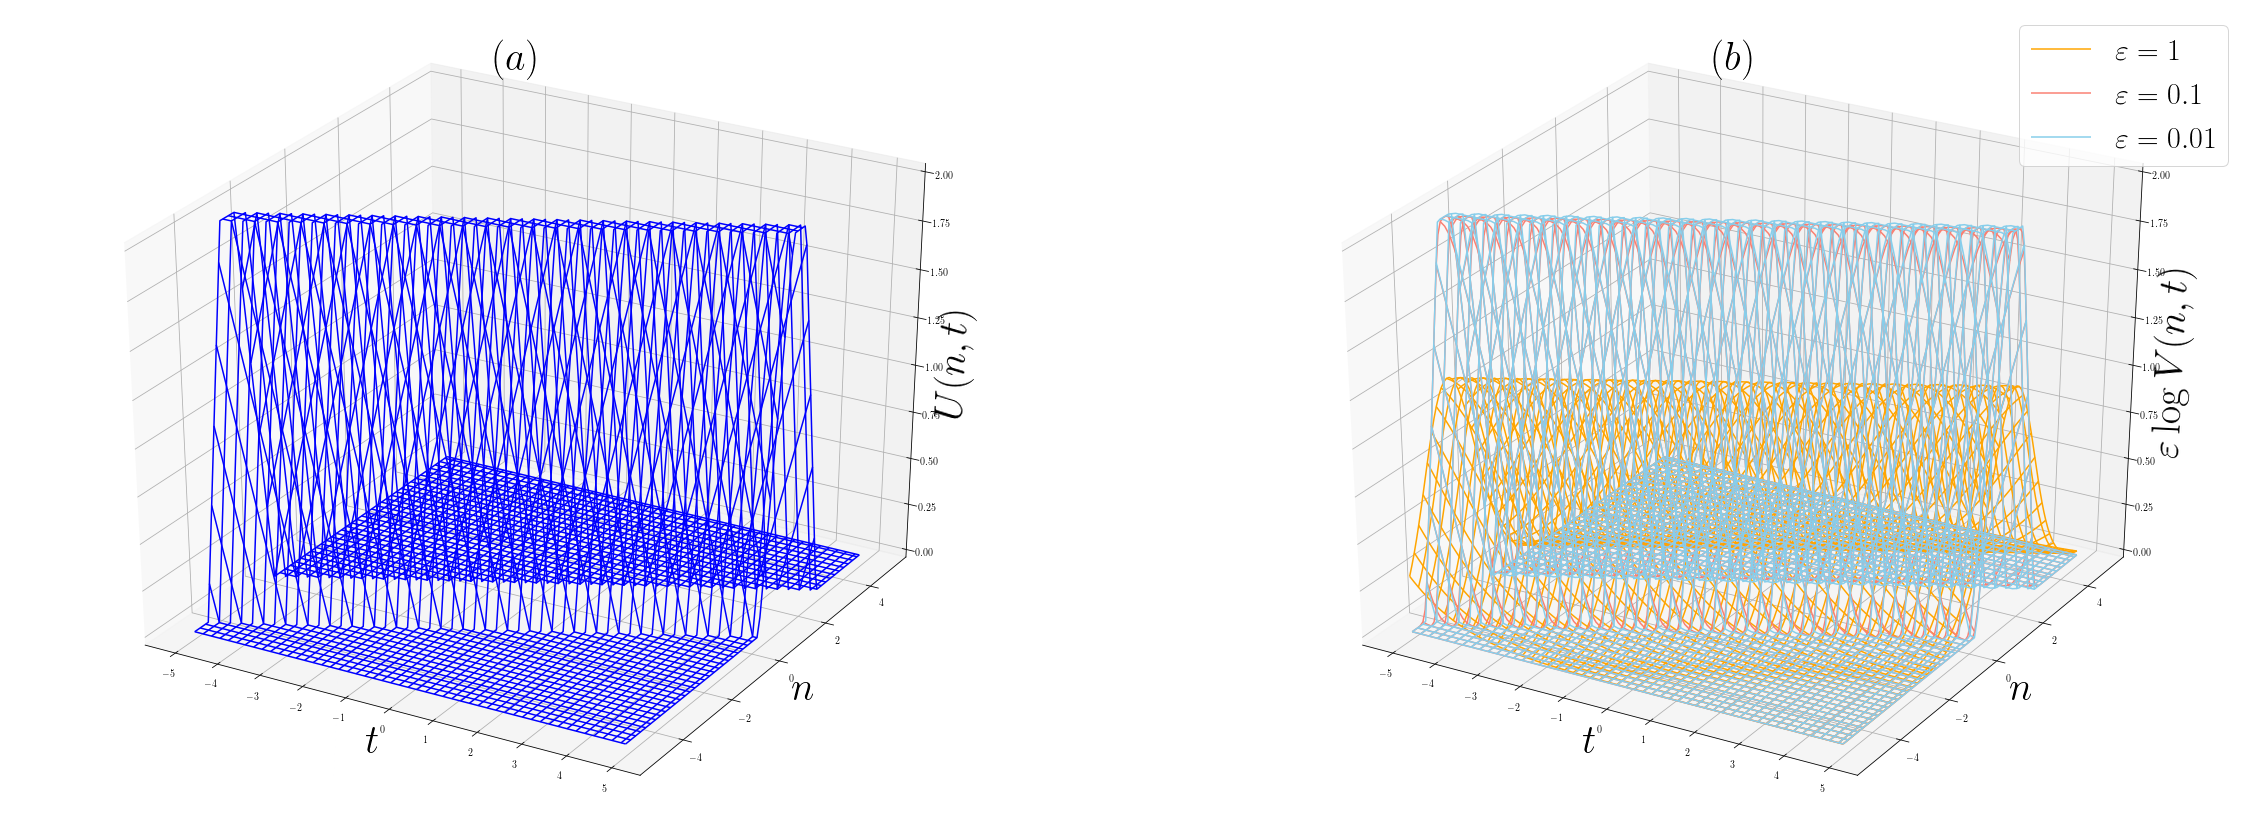

In [42]:
matplotlib.rcParams.update({'text.usetex': True})

fig = plt.figure(figsize=(40,15))


ax = fig.add_subplot(121, projection='3d')
ax.set_title(r'$(a)$',fontsize=40)


ax.set_xlabel(r'$t$',fontsize=40)
ax.set_ylabel(r'$n$',fontsize=40)
#ax.set_zlabel(r'$\varepsilon\log V(n,t)$', fontsize=40)
ax.set_zlabel(r'$U(n,t)$',fontsize=40)
plt.xticks([-5+i for i in range(11)])


ax.plot_wireframe(T,N,Z, rstride=2, cstride=2, color="blue")
#ax.scatter(N, T, W, s=1, color="red")
#ax.plot_surface(N, T, Z, cmap = "summer")
#ax.plot_wireframe(X, Y, Z2, rstride=2, cstride=2)


ax1 = fig.add_subplot(122, projection='3d')

ax1.set_xlabel(r'$t$',fontsize=40)
ax1.set_ylabel(r'$n$',fontsize=40)
ax1.set_zlabel(r'$\varepsilon\log V(n,t)$', fontsize=40)
ax1.set_title(r'$(b)$',fontsize=40)
#ax.set_zlabel(r'$U(n,t)$',fontsize=40)
plt.xticks([-5+i for i in range(11)])

#ax.plot_wireframe(T,N, Z, rstride=2, cstride=2,color="blue")

ax1.plot_wireframe(T,N, W_0, rstride=2, cstride=2,color="orange", label=r'$\varepsilon=1$')

ax1.plot_wireframe(T,N, W_1, rstride=2, cstride=2,color="salmon", label=r'$\varepsilon=0.1$')

ax1.plot_wireframe(T,N, W_2, rstride=2, cstride=2,color="skyblue", label=r'$\varepsilon=0.01$')

ax1.legend(fontsize=30)

#ax.plot_wireframe(T,N, W_3, rstride=2, cstride=2,color="blue")

#ax.scatter(N, T, Z,s=1,color="blue")
#ax.plot_wireframe(N, T, W, rstride=2, cstride=2, color="red")
#ax.scatter(N, T, W, s=1, color="red")
#ax.plot_surface(N, T, Z, cmap = "summer")
#ax.plot_wireframe(X, Y, Z2, rstride=2, cstride=2)



plt.savefig("lv_a1p3.eps",bbox_inches='tight', pad_inches=0)

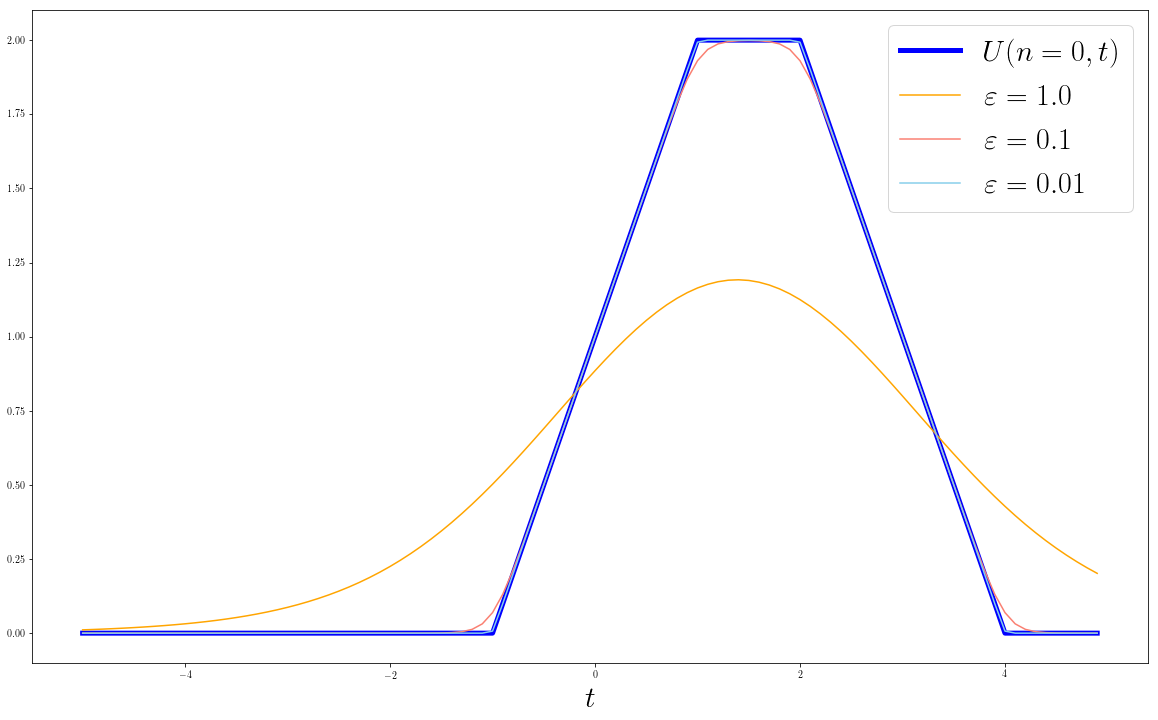

In [63]:
n=0
time=np.arange(-5,5,0.1)

plt.figure(figsize=(20,12))
plt.xlabel(r'$t$',fontsize=30)

U=np.array([u(n,_) for _ in time])
V1=np.log(v(n,time,1).astype(float))
V2=0.1*np.log(v(n,time,0.1).astype(float))
V3=0.01*np.log(v(n,time,0.01).astype(float))

plt.plot(time,U,color="blue",linewidth=5,label=r'$U(n=0,t)$')
plt.plot(time,V1,color="orange",label=r'$\varepsilon=1.0$')
plt.plot(time,V2,color="salmon",label=r'$\varepsilon=0.1$')
plt.plot(time,V3,color="skyblue",label=r'$\varepsilon=0.01$')
plt.legend(fontsize=30)

plt.savefig("lv_a1p2_n0.eps")